# Global Warming
## Temperatures in past 300 years around the world
We are looking the average temperature over 300 years of the world and of each continent. The hypotheis is the global temperatur

Data: https://www.kaggle.com/code/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming/data

In [18]:
# import lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
file="/Users/yuenyeelo/Documents/Jobs/springboard/projects/Unit20/StoryTelling/data/GlobalLandTemperaturesByCity.csv"

df_temp = pd.read_csv(file)


# Explortory Data Analysis


In [32]:
print("data size ", df_temp.shape)
print("columns" , df_temp.columns)
df_temp.head()

data size  (8599212, 7)
columns Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [33]:
df_temp.dropna(inplace=True)
print("data size ", df_temp.shape)
print("columns" , df_temp.columns)

data size  (8235082, 7)
columns Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [34]:
df_temp.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [35]:
df_temp['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [36]:
df_temp['dt'][:1]

0    1743-11-01
Name: dt, dtype: object

In [37]:
df_temp['dt'][-1:]

8599210    2013-08-01
Name: dt, dtype: object

In [38]:
# country list
countries = np.unique(df_temp['Country'])
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Belarus' 'Belgium' 'Benin' 'Bolivia' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo' 'Congo (Democratic Republic Of The)' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' "Côte D'Ivoire" 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guinea Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Laos' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Macedonia'
 'Madagascar' 'Malawi' 'Malaysia' '

In [39]:
mean_temp = []
for country in countries:
    mean_temp.append(df_temp[df_temp['Country'] == country]['AverageTemperature'].mean())

In [40]:
df_mean_by_country=pd.DataFrame({"Country": countries, "mean_temp": mean_temp})
print(mean_temp)

[13.816496896263587, 15.525828490208427, 17.763205946291528, 21.759715773235612, 16.999215885618266, 8.375597043951766, 16.701462142476366, 6.285928363866041, 11.11366381418095, 24.78697831775695, 25.85560129096327, 25.052512225575114, 6.142253198041726, 9.72619695875829, 26.975880208333376, 11.352980175438574, 10.449959128237516, 18.996498131340086, 21.90276297977477, 10.580413274975184, 27.815294546436224, 26.016839989290336, 20.80635582089551, 26.918136297728335, 24.631562757558196, 4.900387156374136, 24.950858213256467, 27.18982939481266, 11.770133066906789, 12.542541204592437, 22.683264177371438, 23.866440922190183, 23.240345757415298, 24.852329749103927, 10.57346694040851, 25.59688167009913, 19.03456376594148, 8.075891092861651, 25.788026983337325, 7.8026399241945725, 29.152790108564506, 25.884052560376702, 20.539170537427825, 21.487249035256728, 25.262852550939673, 25.17832420749279, 24.001515877771144, 4.695704832596344, 20.611525296730854, 3.7116445356917227, 10.33791826349409

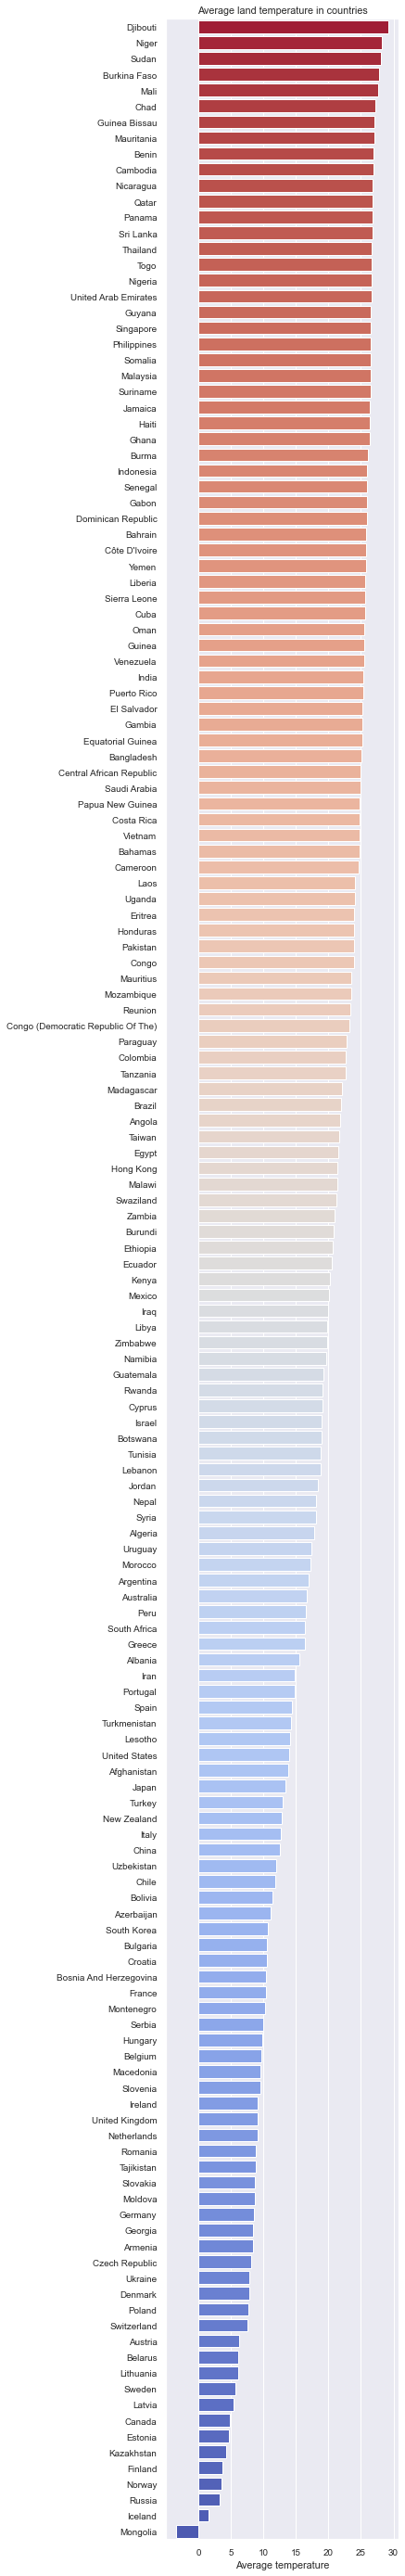

In [43]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [44]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# Global average temperature over years
In this section, we explore the average temperature over years and see if there any tend of global temperature.

In [45]:
years = np.unique(df_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

In [46]:

for year in years:
    mean_temp_world.append(df_temp[df_temp['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperature'].mean())
    mean_temp_world_uncertainty.append(df_temp[df_temp['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Tend
Over the past 280 years, the temperature increased from average 10C to 18C. 
Humans were already increasing carbon dioxide in the 1800s. 


Ref: https://theconversation.com/scientists-understood-physics-of-climate-change-in-the-1800s-thanks-to-a-woman-named-eunice-foote-164687
        

# Average temperature across continent over year
In this section, let see if the tend on different continent

In [47]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = df_temp[df_temp['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

# Temperature increased over years across the continent
It look like in last 50 years, the tend of increaing temperature is faster

In [49]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[-50:]) for i in range(len(continent))]

j = 0
for country in continent:
    all_temp_country = df_temp[df_temp['Country'] == country]
    i = 0
    for year in years[-50:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

# Conclusion
- Temperature increased over last 250 years
- Temperature increased faster in the past 50 years, after the 2nd world war. 
- We need to take action of global warming

# Future improvement
- We can also look at more data to have more understand the global warm and what can we do to reduce/slow down the problem
    - Data of population
    - Data of carbon emission
    - number of cars
    - type of feul used 
    by each country/regions/continent
